In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [25]:
ka1 = 0.1
kb1 = 33
ka2 = 0.1362
kb2 = 48.17
L = 100

Kd1 = (kb1/10**6)/ka1
Kd2 = (kb2/10**6)/(ka2/2)


T_array = np.array(range(1000))

Kd = (Kd1*Kd2)/(Kd2 + (T_array/L**2))

In [26]:
T_array.size

1000

In [27]:
file = open('histogram_complexes_time.dat', 'r')


real_iterations = 50000 + 1
time = np.zeros(real_iterations)
A = np.zeros(real_iterations)
P = np.zeros(real_iterations)
T = np.zeros(real_iterations)
AP = np.zeros(real_iterations)
APT = np.zeros(real_iterations)

count = -1
for line in file:
    linesplit = line.split()

    if linesplit[0] == 'Time':
        count += 1
        time[count] = float(linesplit[2])

    if linesplit[1] == 'ap2:' and len(linesplit) == 3:
        A[count]= (int(linesplit[0]))

    if linesplit[1] == 'pip2:' and len(linesplit) == 3:
        P[count] = (int(linesplit[0]))

    if linesplit[1] == 'trans:' and len(linesplit) == 3:
        T[count] = (int(linesplit[0]))
        
    if linesplit[1] == 'pip2:' and len(linesplit) == 5:
        AP[count] = (int(linesplit[0]))
        
    if linesplit[1] == 'pip2:' and len(linesplit) == 7:
        APT[count] = (int(linesplit[0]))

In [28]:
K_obs = ((A[-1]/L**3)*(P[-1]/L**2))/((APT[-1]/L**2)+(AP[-1]/L**2))

dict = {}

dict[K_obs] = T[-1]

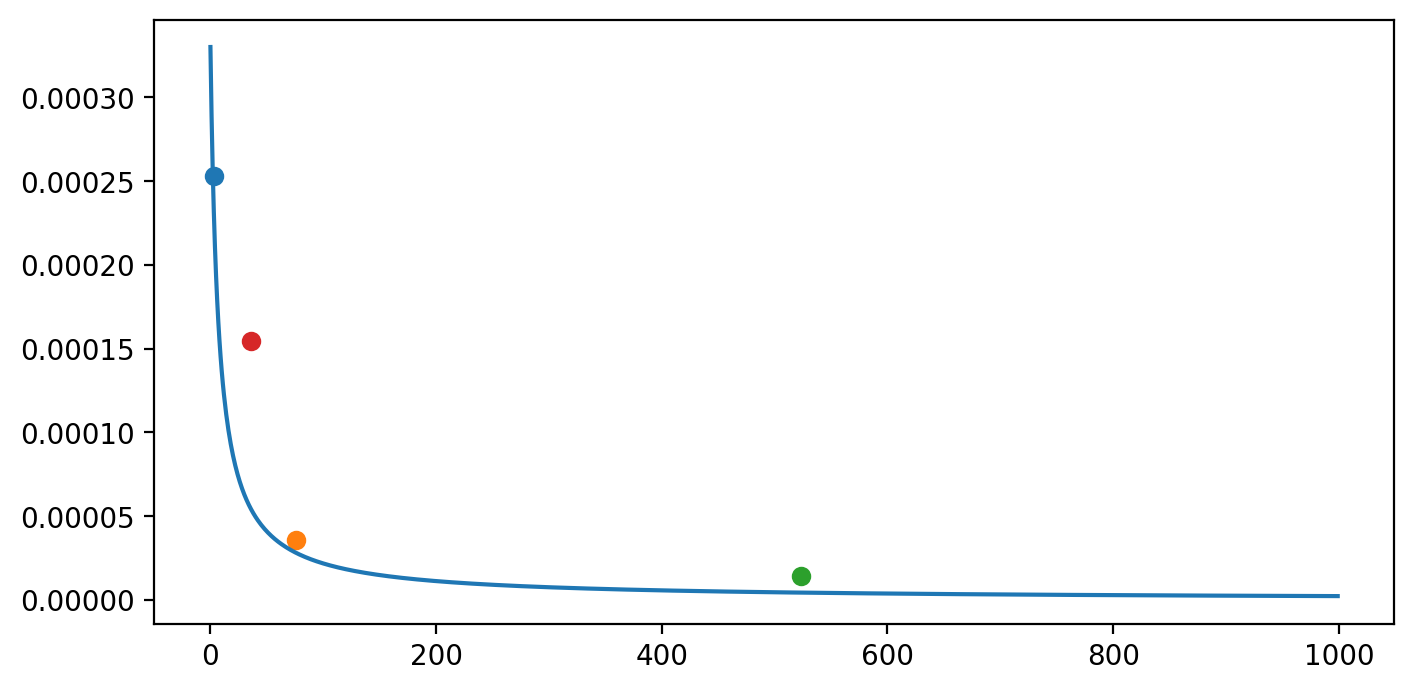

In [31]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)

ax.plot(T_array, Kd)
ax.scatter(T[-1], K_obs) #p_excess
ax.scatter(76.0, 3.595464362850972e-05) #t_excess
ax.scatter(523.0, 1.4027027027027026e-05) #t>a_excess
ax.scatter(36.0, 0.00015460273972602742) #p_low
#ax.plot(AP,c='cyan',alpha=0.5,lw=0.5,ls='--', label = 'AP');

In [16]:
T_array.size

1000